Medidas de Dispersión
===

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Definición del problema 

El [conjunto de datos de la flor Iris](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos) contiene 150 muestras de las medidas del ancho y el largo del pétalo y del sépalo para las tres especies de esta flor (Iris setosa, Iris virginica e Iris versicolor). A partir de la muestra de datos se desean responder la siguiente pregunta:


* **P2**.--- ¿Cuál es el rango típico de la longitud y ancho del pétalo y del sépalo para cada uno de los tipos de flores?

## Carga de datos

In [3]:
#
# Se cargan los datos y se realiza una inspección
# inicial de la tabla y los datos
#
iris = sns.load_dataset('iris')

display(
    iris.head(),
    iris.tail()
)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## P2.--- ¿Cuál es el rango típico de la longitud y ancho del pétalo y del sépalo para cada uno de los tipos de flores?

Esta pregunta se refiere a una medida de la dispersión o variabilildad de los datos y a como se distribuyen.

### Métricas basadas en la distancia respecto a las métricas de localización

**Desviación:** 

Diferencia entre el valor observado y el valor estimado de localización. En modelado sus sinónimos son errores o residuales.

**Rango:** 

Diferencia entre el valor más grande y más pequeño de la muestra de los datos.

In [4]:
iris_melt = pd.melt(
    iris,
    id_vars="species",
    var_name="Variables",
    value_name="Values",
)

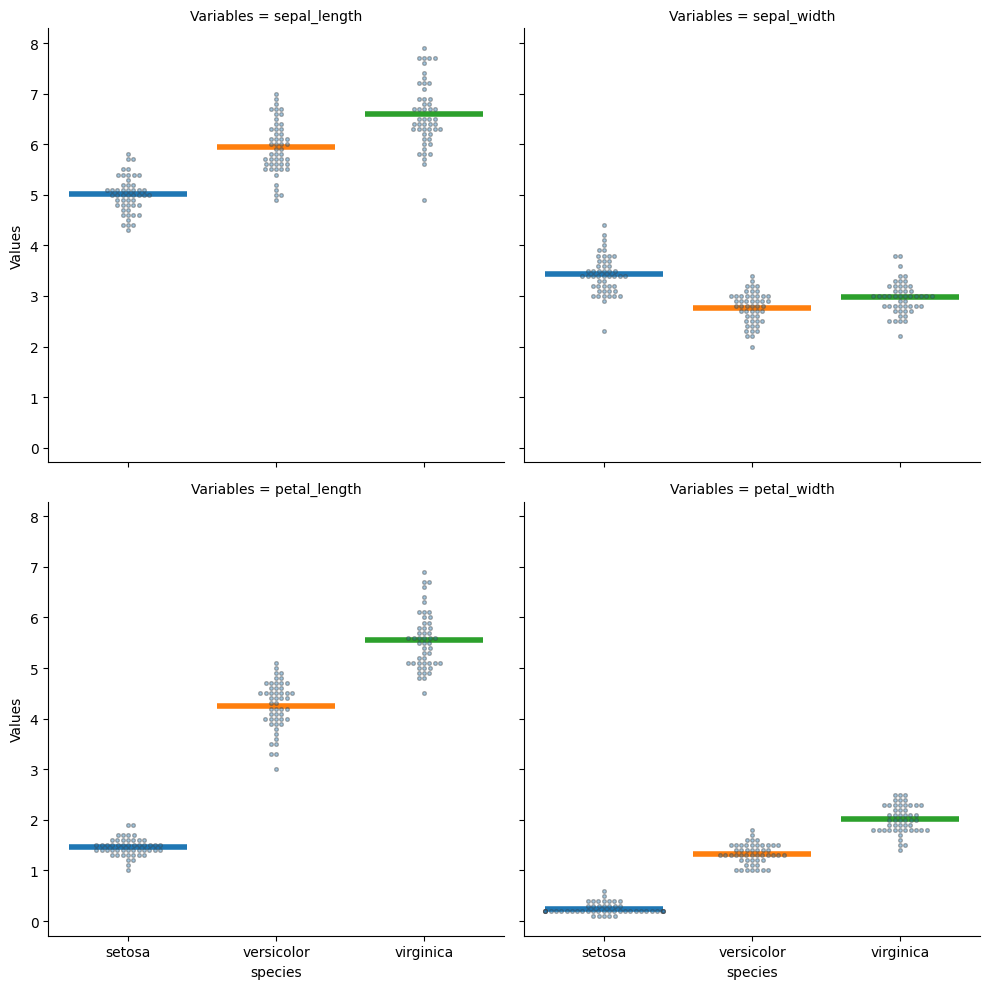

In [5]:
g = sns.catplot(
    x="species",
    y="Values",
    data=iris_melt,
    col="Variables",
    kind="swarm",
    col_wrap=2,
    alpha=0.4,
    s=7,
    edgecolors="k",
    linewidth=1,
)

colors = ['tab:blue', 'tab:orange', 'tab:green']

means = iris.groupby("species").mean()

for i_axes in range(4):
    ax = g.axes[i_axes]
    x_lim = ax.get_xlim()
    mean_values = means[means.columns[i_axes]]
    for i, (color, mean_value) in enumerate(zip(colors, mean_values)):
        g.axes[i_axes].hlines(mean_value, i-0.4, i+0.4,  ls='-', color=color, lw=4)

plt.show()

**Varianza muestral:**

$$s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2$$

In [6]:
#
# Cálculo para una variable
#
from statistics import variance

display(
    iris.sepal_length.var(),
    variance(iris.sepal_length),
    np.var(iris.sepal_length),
)

0.6856935123042507

0.6856935123042506

0.6811222222222223

In [7]:
#
# Cálculo para las columnas del dataframe
#
iris.var(numeric_only=True)

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

In [8]:
#
# Cálculo por especie
#
iris.groupby('species').var()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


**Desviación estándar muestral**.

Raíz cuadrada de la varianza muestral.

In [9]:
#
# Cálculo para una variable
#
from statistics import stdev

display(
    iris.sepal_length.std(),
    stdev(iris.sepal_length),
    np.std(iris.sepal_length),
)

0.828066127977863

0.8280661279778629

0.8253012917851409

In [10]:
#
# Cálculo para las columnas del dataframe
#
iris.std(numeric_only=True)

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [11]:
#
# Cálculo por especie
#
iris.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


**Desviación media absoluta (MAD):**

Norma L1 o distancia de Manhattan.

$$\text{MAD} = \frac{1}{n} \sum_{i=1}^n |x_i - \bar{x}|$$

In [12]:
#
# Cálculo para las columnas del dataframe
#
from scipy.stats import median_abs_deviation

iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].apply(median_abs_deviation, axis=0)

sepal_length    0.70
sepal_width     0.30
petal_length    1.25
petal_width     0.70
dtype: float64

In [13]:
#
# Cálculo por especie
#
iris.groupby('species').apply(median_abs_deviation)

species
setosa        [0.20000000000000018, 0.25, 0.1000000000000000...
versicolor    [0.3500000000000001, 0.20000000000000018, 0.34...
virginica     [0.40000000000000036, 0.20000000000000018, 0.4...
dtype: object

**Desviación absoluta de la mediana:** 

Ya que la varianza y la desviación media absoluta no son robusta a outliers, se puede realizar un estimado de la desviación usando la mediana $m$ de la muestra:

$$\text{Mediana}(|x_1 - m|,\; |x_2 - m|,\;...,\;|x_n - m|)$$ 


También es posible computar la varianza muestral truncada en analogía a la media truncada.

In [14]:
def madm(df):
    d = df._get_numeric_data().copy()
    m = d.median()
    for c in d.columns:
        d[c] = d[c] - m[c]
    return d.apply(median_abs_deviation)


madm(iris)

sepal_length    0.70
sepal_width     0.30
petal_length    1.25
petal_width     0.70
dtype: float64

In [15]:
#
# Cálculo por especie
#
def madm(x):
    m = x.median()
    x = x - m
    x = x.abs()
    return x.mean()
    

iris.groupby('species').agg(madm)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.270,0.284,0.130,0.066
versicolor,0.420,0.250,0.376,0.154
virginica,0.492,0.238,0.440,0.226


### Métricas basadas en la distribución de los datos

**Función de Densidad Acumulada Empírica (ECDF)**

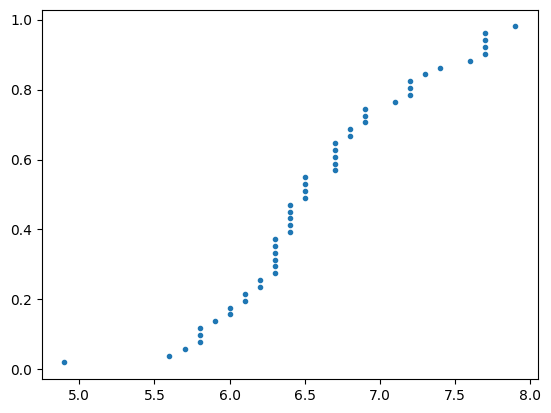

In [16]:
def ecdf(ax, data, param_dict=None):
    
    if param_dict is None:
        param_dict = {}
        
    props = {
        'marker': '.',
        'linestyle': 'none',
    }
    
    props = {**props, **param_dict}
    
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / (len(data) + 1)
    out = ax.plot(x, y, **props)
    return out
    
    
_, ax = plt.subplots(1, 1)
ecdf(ax, iris.sepal_length[iris.species == 'virginica'])
plt.show()

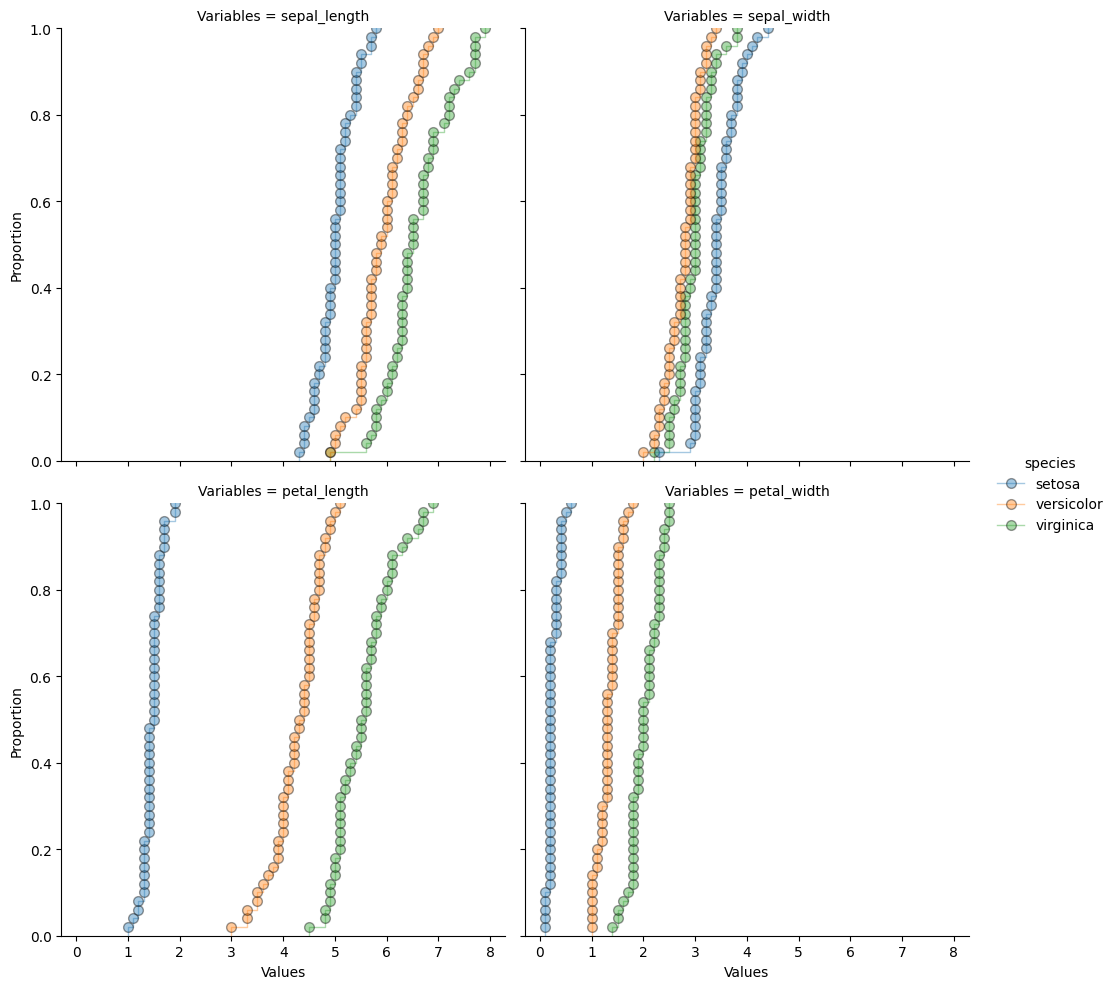

In [17]:
sns.displot(
    kind="ecdf",
    x="Values",
    hue='species',
    data=iris_melt,
    col="Variables",
    col_wrap=2,
    marker='o',
    linestyle=None,
    alpha=0.4,
    markersize=7,
    markeredgecolor="k",
    linewidth=1,
)
plt.show()

**Estadísticos de orden:** Métricas calculadas sobre los datos ordenados.

* **Percentil** $p$: Valor para el cual el $p$ por ciento de los datos son menores o iguales. 

* **decil** $d$: Valor para el cual el $d$ por ciento de los datos son menores o iguales. $d$ es un múltiplo de 10.

* **Cuartil inferior:** Valor para el cual el 25% de las observaciones son más pequeñas (percentil del 25%).

* **Cuartil superior:** Valor para el cual el 25% de las observaciones son más grandes (percentil del 75%).

* **Rango intercuartil (IQR):**

$$\text{IQR} = \text{Cuartil superior} - \text{Cuartil inferior}$$

In [18]:
#
# Cálculo de los cuartiles
#
iris.quantile(
    # -------------------------------------------------------------------------
    # the quantile(s) to compute
    q=[0.25, 0.75],
    # -------------------------------------------------------------------------
    # Specifies the interpolation method to use, when the desired quantile lies
    # between two data points i and j:
    # {‘linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’}
    interpolation='linear',
    # -------------------------------------------------------------------------
    numeric_only=True,
)

,sepal_length,sepal_width,petal_length,petal_width
0.25,5.1,2.8,1.6,0.3
0.75,6.4,3.3,5.1,1.8


In [19]:
#
# Cálculo de cuartiles
#
display(
    iris.quantile(0.25, numeric_only=True),
    iris.quantile(0.75, numeric_only=True)
)

sepal_length    5.1
sepal_width     2.8
petal_length    1.6
petal_width     0.3
Name: 0.25, dtype: float64

sepal_length    6.4
sepal_width     3.3
petal_length    5.1
petal_width     1.8
Name: 0.75, dtype: float64

In [20]:
iris.groupby("species").quantile(0.25)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.800,3.200,1.4,0.2
versicolor,5.600,2.525,4.0,1.2
virginica,6.225,2.800,5.1,1.8


In [21]:
iris.groupby("species").quantile(0.75)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.2,3.675,1.575,0.3
versicolor,6.3,3.000,4.600,1.5
virginica,6.9,3.175,5.875,2.3


In [22]:
iris.groupby("species").quantile(0.75) - iris.groupby("species").quantile(0.25)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.400,0.475,0.175,0.1
versicolor,0.700,0.475,0.600,0.3
virginica,0.675,0.375,0.775,0.5


In [23]:
#
# El método describe de pandas computa los principales estadísticos para las
# columnas numéricas del dataframe
#
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
for column in iris._get_numeric_data().columns:
    print(column)
    print(iris.groupby("species")[column].describe())
    print("")

sepal_length
            count   mean       std  min    25%  50%  75%  max
species                                                      
setosa       50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
versicolor   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
virginica    50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9

sepal_width
            count   mean       std  min    25%  50%    75%  max
species                                                        
setosa       50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4
versicolor   50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
virginica    50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8

petal_length
            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

petal_width
  

In [25]:
#
# Método describe aplicado a una columna particular
#
iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

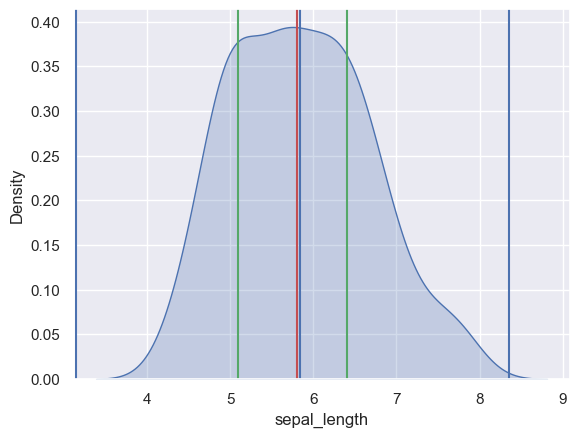

In [26]:
descriptive_stats = iris.sepal_length.describe()

q75 = iris.sepal_length.describe()['75%']
q25 = iris.sepal_length.describe()['25%']
iqr = q75 - q25

upper_outliers = q75 + 1.5 * iqr
lower_outliers = q25 - 1.5 * iqr

sns.set(color_codes=True)

sns.kdeplot(iris['sepal_length'], shade=True)
plt.axvline(iris.sepal_length.mean())
plt.axvline(iris.sepal_length.median(), color='r')
plt.axvline(q25, color='g')
plt.axvline(q75, color='g')
plt.axvline(upper_outliers, color = 'b')
plt.axvline(lower_outliers, color = 'b')
plt.show()

**Diagramas de caja y bigote**

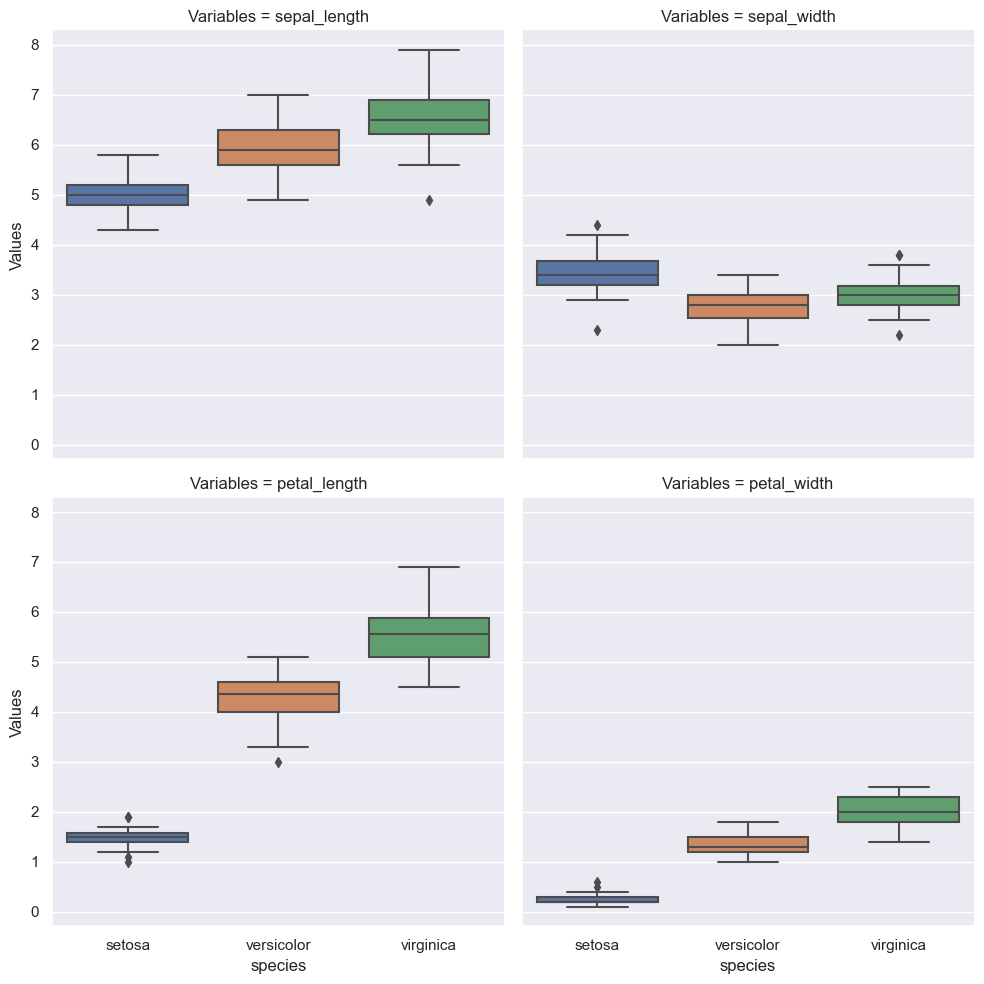

In [27]:
#
# La caja central representa los cuartiles del 25% y 75%.
# La línea centra de la caja representa la mediana
# Los bigotes están ubicados a 1.5 veces el rango interquartil.
# Los puntos por fuera de los bigotes representan outliers.
#
sns.catplot(
    x="species",
    y="Values",
    data=iris_melt,
    col="Variables",
    kind="box",
    col_wrap=2,
)
plt.show()

**Medidas de forma**

In [28]:
from scipy.stats import skew

display(
    iris.sepal_length.skew(),
    skew(iris.sepal_length),
)

0.3149109566369728

0.3117530585022963

In [29]:
from scipy.stats import kurtosis

display(
    iris.sepal_length.kurt(),
    kurtosis(iris.sepal_length),
)

-0.5520640413156395

-0.5735679489249765